After you run this cell, the variable 'measurements' will have the light curve data and the variable 'errors' will have the errors for each point

Text(0.5,0,'Days')

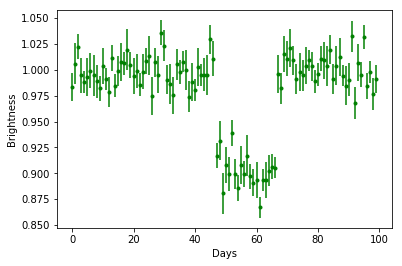

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# the data are in days so we'll create a numpy array for this
x = np.arange(0,100,1)

# create an array of 100 elements all with a value of 1
measurements = np.ones(100)

# change values 47 to 67 to be 0.9 instead of 1.0
measurements[47:67] = 0.9

# create a seed value so that we get the same random 
# values each time we run the notebook
np.random.seed(111)
measurements = measurements + np.random.normal(0, 0.015, 100)
errors = 0.01 + np.random.uniform(0, 0.01, 100)

# plot the data
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.ylabel('Brightness')
plt.xlabel('Days')

Example of how to create a model. We model is just three line segments

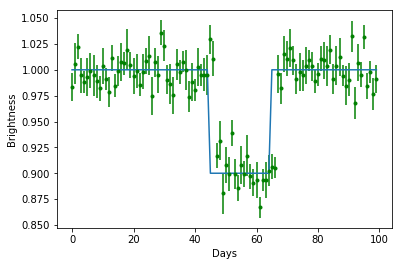

In [4]:
# create a 100-element array of all 1's
model1 = np.ones(100)

# adjust some of the values to match what we're seeing in the star light data
# for example, it looks like the brightness dips to 0.9 between days 45 and 65
# let's reflect this in our model
model1[45:65] = 0.9

# let's plot our model on top of our data to see how it looks
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.ylabel('Brightness')
plt.xlabel('Days')
plt.plot(x, model1)

Create 4 more models and compute chi-squared

In [5]:
#create a 100-element array of all 1's
model2 = np.ones(100)
model2[48:68] = 0.89
model3 = np.ones(100)+.01
model3[48:68] = 0.89
model4 = np.ones(100)-0.01
model4[48:68] = 0.89
model5 = np.ones(100)
model5[50:70] = 0.89

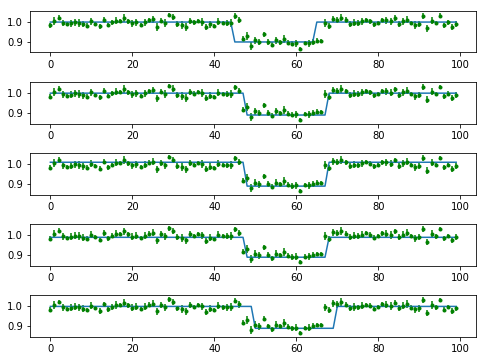

In [6]:
plt.figure(figsize=(8,6))
plt.subplot(5, 1, 1)
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.plot(x, model1)

plt.subplot(5, 1, 2)
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.plot(x, model2)

plt.subplot(5, 1, 3)
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.plot(x, model3)

plt.subplot(5, 1, 4)
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.plot(x, model4)

plt.subplot(5, 1, 5)
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.plot(x, model5)

plt.subplots_adjust(hspace=.7)

chi-squared calculations

In [7]:
chi_1 = ((measurements - model1)**2/errors**2).sum()
chi_2 = ((measurements - model2)**2/errors**2).sum()
chi_3 = ((measurements - model3)**2/errors**2).sum()
chi_4 = ((measurements - model4)**2/errors**2).sum()
chi_5 = ((measurements - model5)**2/errors**2).sum()
print("Chi-squared for model 1:", chi_1)
print("Chi-squared for model 2:", chi_2)
print("Chi-squared for model 3:", chi_3)
print("Chi-squared for model 4:", chi_4)
print("Chi-squared for model 5:", chi_5)

Chi-squared for model 1: 383.89029748221395
Chi-squared for model 2: 196.5220121752068
Chi-squared for model 3: 253.54576118318224
Chi-squared for model 4: 219.80051584420656
Chi-squared for model 5: 327.46112754552934


From these results, model 2 is the best fit

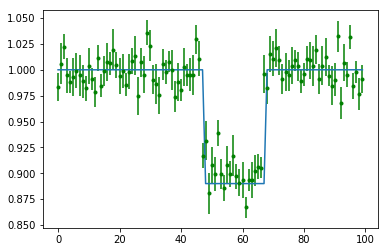

In [44]:
plt.errorbar(x, measurements, errors, fmt='.', color='green')
plt.plot(x, model2)

In [42]:
import math
# for model 2 we used
# model2[48:68] = 0.89
# which means the dip goes from 1 down to 0.89
depth = 1.0 - 0.89
r_planet = 2 * math.sqrt(depth) * 100
print("We discovered a planet with a radius %0.3f times that of Jupiter" % (r_planet))

We discovered a planet with a radius 66.332 times that of Jupiter


In [10]:
import pandas as pd
url = 'https://narock.github.io/teaching/CST-411/kepler_lightcurve_206103150_c3.txt'
data = pd.read_csv(url)

In [11]:
data.head()

,BJD,Flux
0,2146.452489,1.000410
1,2146.513785,1.000296
2,2146.534218,1.000208
3,2146.554650,1.000183
4,2146.575082,1.000185


([<matplotlib.axis.XTick at 0x7f9eaf0255c0>,
 <a list of 3 Text xticklabel objects>)

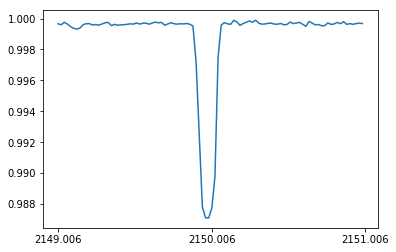

In [15]:
d = data[ (data['BJD'] > 2149.0) & (data['BJD'] < 2151)]
plt.plot(d['BJD'],d['Flux'])
plt.xticks(np.arange(min(d['BJD']), max(d['BJD'])+1, 1.0))

([<matplotlib.axis.XTick at 0x7f9eae972d30>,
 <a list of 3 Text xticklabel objects>)

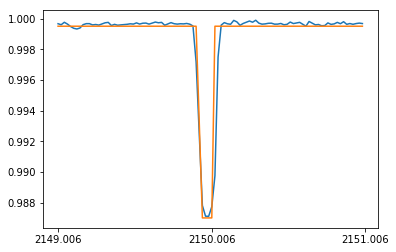

In [46]:
model = np.ones( len(d['Flux']) )-0.0005
model[41:45] = 0.987
plt.plot(d['BJD'],d['Flux'])
plt.plot(d['BJD'], model)
plt.xticks(np.arange(min(d['BJD']), max(d['BJD'])+1, 1.0))

In [25]:
chi_sq = ((d['Flux'] - model)**2/model).sum()
print("Model/Obs. chi-squared:", chi_sq)

Model/Obs. chi-squared: 0.00010850077635222591


In [26]:
import scipy.stats
scipy.stats.chisquare(d['Flux'], f_exp=model)

Power_divergenceResult(statistic=0.00010850077635222591, pvalue=1.0)

In [43]:
depth = 1.0 - 0.0005 - 0.987
r_planet = 1.16 * math.sqrt(depth) * 100
print("We discovered a planet with a radius %0.3f times that of Jupiter" % (r_planet))

We discovered a planet with a radius 12.969 times that of Jupiter


(2149, 2155)

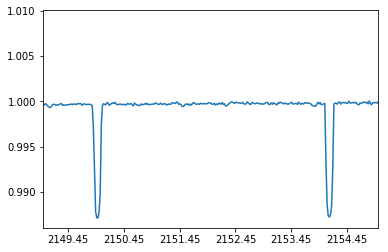

In [34]:
plt.plot(data['BJD'],data['Flux'])
plt.xticks(np.arange(min(data['BJD']), max(data['BJD'])+1, 1.0))
plt.xlim(2149,2155)

There are 4 days between dips meaning the planets orbit is 4 days.

In [38]:
m_star = 1.11 * 1.989e30
a3 = 1.11 * (4./365.)**2
a = a3**(1/3)
print("The planet is", a, " AU from its star")

The planet is 0.051084099740643686  AU from its star
